**The task.** Design a ReLU network with fewer than 10000 connections that approximates the function $f(x)=\sin x$ on the segment $[-\pi, \pi]$ with uniform error not greater than $10^{-12}$. Implement the network in a Python notebook. Count the number of connections and demonstrate that the error bound is satisfied.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def relu(x):
    return np.maximum(x,0)

def sq_approx(x, Nlayers): # 0 <= x <= 1

    def tooth(x):
        return 2.*relu(x)-4.*relu(x-0.5)+2.*relu(x-1.)
        
    out = 1.*x
    for n in range(Nlayers):
        x = tooth(x)
        out -= 2.**(-2*n-2)*x
    
    Nconnections = 7*Nlayers+1
    return out, Nconnections

$$ \sin{x}=x-{\frac {x^{3}}{3!}}+{\frac {x^{5}}{5!}}-\cdots \ =\sum _{n=0}^{\infty }{(-1)^{n}}{\frac {x^{2n+1}}{(2n+1)!}}\ $$
We want to use approximation of square function in approximation of $\sin{x}$. Thereby we have to take out $x$ in Tailor's series:
$$x\Big(1-{\frac {x^{2}}{3!}}+{\frac {x^{4}}{5!}}-\cdots\Big)$$
The next step is to take away $-\frac {x^{2}}{3!}$ for getting $x^2$ instead of $x^4$:
$$x\Big(1-{\frac {x^{2}}{3!}}\Big(1-{\frac {x^{2}}{4*5}}-\cdots\Big)\Big)$$
Taking N addendums in Tailor series one obtains the expression:
$$x\Big(1-{\frac {x^{2}}{3!}}\Big(1-\cdots\frac {x^{2}}{(2N-2)(2N-1)}\Big(1-{\frac {x^{2}}{2N(2N+1)}}\Big)\Big)\Big)$$


To compute $\sin{x}$ iteratively using this formula we should perform multiplication by our NN with square approximation too.

Consider two values $x, y \in[0,1]$, then their product can be presented as a sum of square functions in this way:
$$xy=\frac{1}{2}({(x+y)}^2-x^2-y^2)$$
In case when $x, y \in[a,b]$ one has to rescale and move values to $[0,1]$ section and perform multiplication. $\frac{x-a}{b-a}$, $\frac{y-a}{b-a}$ are values in $[0,1]$, then
$$\frac{x-a}{b-a}\frac{y-a}{b-a} = \frac{1}{2}\Big({\Big(\frac{x-a}{b-a}+\frac{y-a}{b-a})}^2-\Big(\frac{x-a}{b-a}\Big)^2-\Big(\frac{y-a}{b-a}\Big)^2\Big)$$
Expressing $xy$ from the left side of equation we obtain next equation:
$$xy=\frac{(b-a)^2}{2}\Big[\Big(\frac{x+y-2a}{(b-a)}\Big)^2-\Big(\frac{x-a}{(b-a)}\Big)^2-\Big(\frac{y-a}{(b-a)}\Big)^2\Big]+ax+ay-a^2$$

Suppose $x=\frac {x^{2}}{(2N-2)(2N-1)}$ $y=(1+(-1)^N{\frac {x^{2}}{2N(2N+1)}})$ at initial step and then iteratively modificate them.

### Number of connections in NN approximating multiplication of x and y
<img src="https://pp.userapi.com/c845121/v845121548/12d444/ClC8Qx-UBXg.jpg" alt="Drawing" style="height: 500px;" title=”this text appears when mouse or finger hovers over image” />

$$Nconnections=7*Nlayers+1+N(3*(7*Nlayers+1)+9)$$
where $Nlayers$ - amount of layers in NN approximating square function and $N$ - amount of elements in Taylor's expansion.
N is choosing iteratively from 1 to the number that is enough to make maximum approximation error < $10^{-12}$

In [141]:
#function approximately computes a product xy
def xy(x,y,a,b, Nlayers):
    res=4*(b-a)**2/2*(sq_approx((x+y-2*a)/2/(b-a),Nlayers)[0]-sq_approx((x-a)/2/(b-a),Nlayers)[0]-sq_approx((y-a)/2/(b-a),Nlayers)[0])+a*x+a*y-a**2
    return res, (21*Nlayers+3+9)
xy(2,3,1,4,25)

(5.999999999999996, 537)

Number of connections:  6620
Number of elements in Tailor's expansion:  12


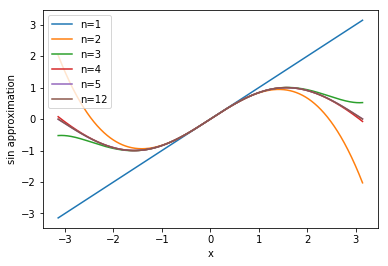

Text(0,0.5,'approximation error')

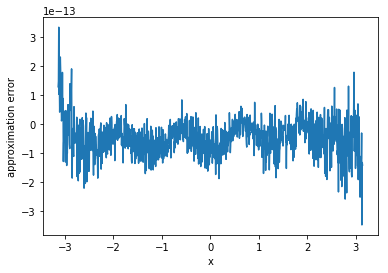

In [143]:
def sin_approx(x,Nlayers,N):
    x_sq=sq_approx((x+np.pi)/2/np.pi,Nlayers)[0]*4*np.pi**2-np.pi**2-2*x*np.pi
    Nconnections=7*Nlayers+1
    y=1
    for i in range(1,N)[::-1]:
        res=xy(x_sq/2/i/(2*i+1),y,-np.pi,np.pi,Nlayers)
        y = 1-res[0]
        Nconnections+=res[1]
        #print(y)
    res=xy(x,y,-2*np.pi,2*np.pi,Nlayers)
    y=res[0]
    Nconnections+=res[1]
    return y,Nconnections
x=np.linspace(-np.pi,np.pi,1000)
N = 1
res=sin_approx(x,25,1)
while np.max(np.abs((res[0]-np.sin(x)))) > 10**(-12):
    if N<=5:
        plt.plot(x,res[0],label=('n='+str(N)))
    N += 1
    res=sin_approx(x,25,N)

plt.plot(x,res[0],label=('n='+str(N)))
plt.legend()
plt.xlabel('x')
plt.ylabel('sin approximation')
print('Number of connections: ',res[1])
print('Number of elements in Tailor\'s expansion: ',N)
plt.show()
plt.plot(x,res[0]-np.sin(x))      
plt.xlabel('x')
plt.ylabel('approximation error')
    